In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import gridspec
%matplotlib inline

In [2]:
fname = "./cyclictest/cyclictest_log_nonrt.txt"
T = np.genfromtxt(fname, skip_header = 2, skip_footer=7, delimiter=' ')
delay_nrt = T[0:,0]
num_nrt = T[0:,1]


fname = "./cyclictest/cyclictest_nano.txt"
T = np.genfromtxt(fname, skip_header = 2, skip_footer=7, delimiter=' ')
delay_nano = T[0:,0]
num_nano = T[0:,1]

fname = "./cyclictest/cyclictest_posix_high.txt"
#fname = "./cyclictest_result_nanosleep.txt"
T = np.genfromtxt(fname, skip_header = 2, skip_footer=7, delimiter=' ')
delay_ph = T[0:,0]
num_ph = T[0:,1]

fname = "./cyclictest/cyclictest_posix_low.txt"
#fname = "./cyclictest_result_nanosleep.txt"
T = np.genfromtxt(fname, skip_header = 2, skip_footer=7, delimiter=' ')
delay_pl = T[0:,0]
num_pl = T[0:,1]





In [3]:
def filter_pos(num,delay):
    mask = num > 0
    num = num[mask]
    num /=sum(num)
    delay = delay[mask]
    return (num,delay)

(num_nano, delay_nano) = filter_pos(num_nano,delay_nano)
(num_ph, delay_ph) = filter_pos(num_ph,delay_ph)
(num_pl, delay_pl) = filter_pos(num_pl,delay_pl)
(num_nrt, delay_nrt) = filter_pos(num_nrt, delay_nrt)

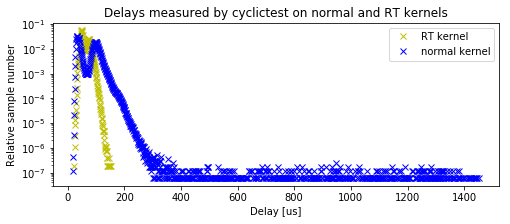

In [4]:
figure(figsize=(8,3))

title(u'Delays measured by cyclictest on normal and RT kernels')

semilogy(delay_nano, num_nano, 'x', Color='y', label='RT kernel')
semilogy(delay_nrt, num_nrt , 'x', Color='b' , label=u'normal kernel')

xlabel(u'Delay [us]')
ylabel(u'Relative sample number')
legend()

savefig('./cyclictest/normal_vs_rt', bbox_inches='tight')

show()

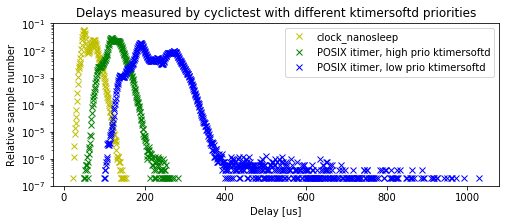

In [5]:
figure(figsize=(8,3))

title(u'Delays measured by cyclictest with different ktimersoftd priorities')

semilogy(delay_nano, num_nano, 'x', Color='y', label='clock_nanosleep')
semilogy(delay_ph, num_ph , 'x', Color='g' , label='POSIX itimer, high prio ktimersoftd')
semilogy(delay_pl, num_pl , 'x', Color='b' , label='POSIX itimer, low prio ktimersoftd')

xlabel(u'Delay [us]')
ylabel(u'Relative sample number')
legend()

savefig('./cyclictest/ktimerprio', bbox_inches='tight')

show()

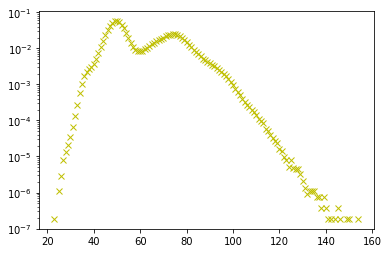

In [6]:
semilogy(delay_nano, num_nano, 'x', Color='y', label='RT kernel')

In [7]:
# non-real time outlyer ratio
limit = 300 # usec
big_mask = delay_nrt > limit
big_datas = num_nrt[big_mask]
outlyer_cnt = np.sum(big_datas)
data_cnt = np.sum(num_nrt)

print outlyer_cnt*1.0/data_cnt*100

0.004700506390737428


In [8]:
# non real time average
average =  np.sum(delay_nrt * num_nrt)/np.sum(num_nrt)
print average

72.08750892557433
